In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Loading the data set
(x_train, _) , (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
#finding the shape
x_train.shape

(60000, 28, 28)

In [7]:
# scaling the image and reshaping
x_train_scaled = x_train.astype('float32') / 255.
x_test_scaled = x_test.astype('float32') / 255.
x_train_scaled = np.reshape(x_train_scaled, (len(x_train_scaled), 28, 28, 1))
x_test_scaled = np.reshape(x_test_scaled, (len(x_test_scaled), 28, 28, 1))

In [8]:
#adding the noise factor for the image
noise_factor = 0.5
x_train_noisy = x_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_scaled.shape) 
x_test_noisy = x_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_scaled.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

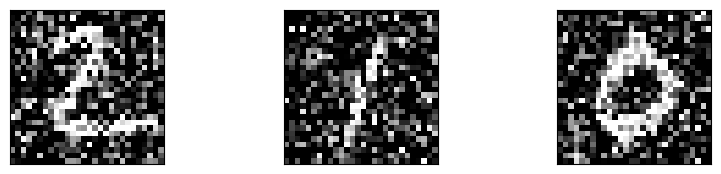

In [17]:
n = 3
plt.figure(figsize=(10, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [19]:
input_img = keras.Input(shape=(28, 28, 1))
conv1  = layers.Conv2D(32,(3,3),activation ='relu',padding = 'same')(input_img)
maxpool1 = layers.MaxPooling2D((2,2),padding='same')(conv1)
conv2  = layers.Conv2D(32,(3,3),activation ='relu',padding = 'same')(maxpool1)
maxpool2 = layers.MaxPooling2D((2,2),padding='same')(conv1)
conv3  = layers.Conv2D(32,(3,3),activation ='relu',padding = 'same')(maxpool2)
maxpool3 = layers.MaxPooling2D((2,2),padding='same')(conv3)
conv4  = layers.Conv2D(32,(3,3),activation ='relu',padding = 'same')(maxpool3)
upsamp1 = layers.UpSampling2D((2,2))(conv4)
conv5  = layers.Conv2D(32,(3,3),activation ='relu',padding = 'same')(upsamp1)
upsamp2 = layers.UpSampling2D((2,2))(conv5)
output = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(upsamp2)

autoencoder = keras.Model(input_img, output)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train_scaled,
                epochs=2,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_scaled))

Epoch 1/2
469/469 [==============================] - 113s 239ms/step - loss: 0.1552 - val_loss: 0.1131
Epoch 2/2
469/469 [==============================] - 113s 242ms/step - loss: 0.1103 - val_loss: 0.1072


In [24]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 32)          9248  

313/313 [==============================] - 4s 14ms/step


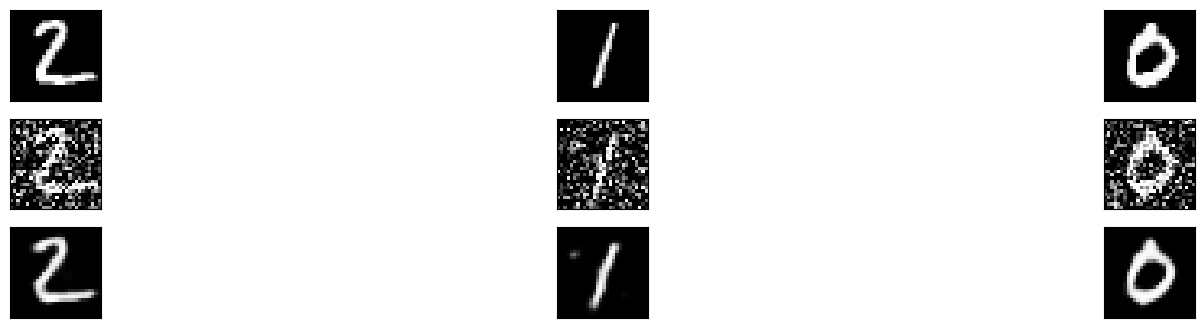

In [23]:
decoded_imgs = autoencoder.predict(x_test_noisy)
n = 3
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test_scaled[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy
    ax = plt.subplot(3, n, i+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)    

    # Display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()